# Python Libraries



In [22]:
# Importar la función load_digits desde la librería sklearn.datasets
from sklearn.datasets import load_digits
# Importar la librería matplotlib para visualización
import matplotlib.pyplot as plt
# Importar la función train_test_split para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importar el clasificador KNeighborsClassifier de la librería sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Importar la libreria Numpy
import numpy as np
# Importar funciones para evaluar el modelo
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Dataset

In [23]:
# Cargar el conjunto de datos "digits" que contiene imágenes de dígitos escritos a mano
digits = load_digits()

### Información del Dataset
- Nombre: digits dataset
- URL: [digits dataset en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

# Dataset documentation

In [24]:
# Imprimir la descripción del conjunto de datos
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Tipo de Problema: Clasificación

Este código resuelve un problema de clasificación en el que se busca etiquetar imágenes de dígitos escritos a mano en categorías numéricas, es decir, asignar a cada imagen un número que corresponde al dígito representado en la imagen. Dado que se trata de una tarea de clasificación, el objetivo es predecir la categoría a la que pertenece cada imagen de dígito.

# Dimensions

In [25]:
# Mostrar la forma (dimensiones) de los datos de las imágenes y las etiquetas
digits.data.shape

(1797, 64)

In [26]:
# Mostrar la forma (dimensiones) de  las etiquetas
digits.target.shape

(1797,)

# Select a dataset element

In [27]:
# Mostrar los valores de los datos en la posición 15
digits.data[15]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

# Data Preview

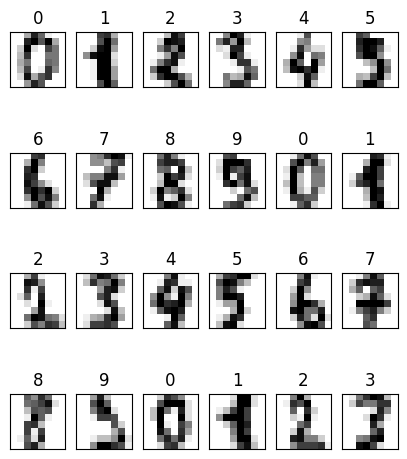

In [28]:
# Crear una cuadrícula de subplots para mostrar imágenes y etiquetas
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(5, 6))

# Iterar sobre la cuadrícula de subplots y mostrar imágenes y etiquetas
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

In [29]:
# Ajustar el diseño de la visualización
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

# Split Test

In [30]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state=11)

In [31]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape
X_test.shape

(450, 64)

# KNeighborsClassifier

In [32]:
# Crear un clasificador KNeighborsClassifier
knn = KNeighborsClassifier()

In [33]:
# Entrenar el clasificador con los datos de entrenamiento
knn.fit(X=X_train, y=Y_train)


KNeighborsClassifier()

# Make predictions

In [34]:
# Realizar predicciones en el conjunto de prueba
prediccion = knn.predict(X=X_test)

# True Labels

In [35]:
# Etiquetas reales del conjunto de prueba
esperado = Y_test

# Comparison between Actual Values and Predictions

In [42]:
# Mostrar las primeras 20 predicciones

print("Prediccion",prediccion[:20])
# Mostrar las primeras 20 etiquetas reales

print("Esperado",esperado[:20])

Prediccion [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
Esperado [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


## Métricas de Desempeño para el Subconjunto de Entrenamiento:

En el código, se han calculado varias métricas de desempeño para evaluar el modelo en el conjunto de prueba. Estas métricas incluyen:

Accuracy (Precisión): Mide la fracción de predicciones correctas realizadas por el modelo en relación con el total de predicciones. Es una métrica que cuantifica la precisión global del modelo.

Precision (Precisión Ponderada): Esta métrica se calcula como la precisión promedio ponderada por clase. Es útil en problemas de clasificación multiclase, donde se tienen diferentes clases. La precisión ponderada tiene en cuenta el desequilibrio de clases.

Recall (Recuperación o Sensibilidad Ponderada): Al igual que la precisión ponderada, esta métrica es útil en problemas de clasificación multiclase. Mide la capacidad del modelo para identificar correctamente los elementos de cada clase.

F1-score (Puntuación F1 Ponderada): El puntaje F1 es una métrica que combina la precisión y el recall en un solo valor. Es especialmente útil cuando se busca un equilibrio entre la precisión y la exhaustividad.

# Confusion matrix

In [37]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(esperado, prediccion)

# Calcular las métricas
accuracy = accuracy_score(esperado, prediccion)
precision = precision_score(esperado, prediccion, average='weighted')
recall = recall_score(esperado, prediccion, average='weighted')
f1 = f1_score(esperado, prediccion, average='weighted')

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Matriz de Confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


Matriz de Confusión:

Los valores en la diagonal principal nos muestran las clasificaciones correctas para cada clase.
Los valores fuera de la diagonal principal representan las clasificaciones incorrectas.

Accuracy (Precisión): 0.98

El 98% de todas las muestras fueron clasificadas correctamente.

Precision: 0.98

Para cada clase, en promedio, el 98% de las muestras clasificadas como positivas son realmente positivas. En otras palabras, cuando el algoritmo predice que una muestra es de una cierta clase, en el 98% de los casos esa predicción es correcta.

Recall (Sensibilidad): 0.98

Para cada clase, en promedio, el 98% de las muestras positivas fueron correctamente identificadas por el algoritmo. Asi mismo, éste logra capturar el 98% de las muestras que realmente pertenecen a una clase.
F1-score: 0.98

El F1-score es una métrica que combina tanto la precisión como el recall en una sola medida. Un F1-score alto indica un buen equilibrio entre precisión y recall.

# Moviendo los Hiper-parametros

Algunos de los Hiper-parametros que se movieron a la hora de implementar el modelo de KNeighborsClassifier fueron:

* n_neighbors (Número de Vecinos): Este hiperparámetro controla cuántos vecinos cercanos se utilizarán para realizar una predicción. Cuando modificamos n_neighbors, estamos cambiando la cantidad de vecinos que se considerarán al tomar una decisión de clasificación. Un valor más bajo significa que se considerarán menos vecinos cercanos, lo que puede hacer que el modelo sea más sensible a los detalles locales en los datos. Un valor más alto suavizará las decisiones al considerar un mayor número de vecinos. En el código, hemos cambiado n_neighbors a 5 para considerar 5 vecinos cercanos.

* weights (Pesos): Este hiperparámetro controla cómo se ponderan los vecinos cercanos en la decisión de clasificación. Puede tomar dos valores principales: 'uniform' y 'distance'. Cuando se establece en 'uniform', todos los vecinos tienen el mismo peso en la decisión. Cuando se establece en 'distance', los vecinos más cercanos tienen un peso mayor y los vecinos más lejanos tienen un peso menor. Modificar weights afecta cómo se consideran las contribuciones de los vecinos en la clasificación. En el código, hemos cambiado weights a 'distance' para dar más peso a los vecinos más cercanos.

* metric (Métrica de Distancia): Este hiperparámetro determina la métrica de distancia utilizada para medir la proximidad entre puntos. Puede tomar valores como 'euclidean', 'manhattan', 'chebyshev' y otros. Cada métrica de distancia calcula la distancia de manera diferente. Por ejemplo, 'euclidean' utiliza la distancia euclidiana estándar, mientras que 'manhattan' utiliza la distancia de Manhattan. Cambiar metric afecta cómo se calcula la distancia entre puntos y, por lo tanto, cómo se determina la cercanía de los vecinos. En el código, hemos cambiado metric a 'manhattan' como ejemplo.

In [38]:
# Modificar hiperparámetros del clasificador KNeighborsClassifier
# En este caso, modificamos el número de vecinos y los pesos utilizados en las predicciones.
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')  # Por ejemplo, utilizamos 5 vecinos y pesos 'distance'

# Entrenar el clasificador con los datos de entrenamiento
knn.fit(X=X_train, y=Y_train)
# Realizar predicciones en el conjunto de prueba
prediccion = knn.predict(X=X_test)
# Etiquetas reales del conjunto de prueba
esperado = Y_test
# Mostrar las primeras 20 predicciones
prediccion[:20]
# Mostrar las primeras 20 etiquetas reales
esperado[:20]
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(esperado, prediccion)

# Calcular las métricas
accuracy = accuracy_score(esperado, prediccion)
precision = precision_score(esperado, prediccion, average='weighted')
recall = recall_score(esperado, prediccion, average='weighted')
f1 = f1_score(esperado, prediccion, average='weighted')

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Matriz de Confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  1 53  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  2  0  0  0  0 41  0]
 [ 0  0  0  0  1  0  0  0  1 41]]
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


In [39]:
# Importar la función load_digits desde la librería sklearn.datasets
from sklearn.datasets import load_digits
# Importar la librería matplotlib para visualización
import matplotlib.pyplot as plt
# Importar la función train_test_split para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importar el clasificador KNeighborsClassifier de la librería sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Importar la libreria Numpy
import numpy as np
# Importar funciones para evaluar el modelo
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Ajustar el diseño de la visualización
plt.tight_layout()
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state=11)
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape
X_test.shape

# Modificar hiperparámetros del clasificador KNeighborsClassifier
# Modificamos tres hiperparámetros diferentes: n_neighbors, weights y metric
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')  # Por ejemplo, utilizamos 5 vecinos, pesos 'distance' y métrica 'manhattan'

# Entrenar el clasificador con los datos de entrenamiento
knn.fit(X=X_train, y=Y_train)
# Realizar predicciones en el conjunto de prueba
prediccion = knn.predict(X=X_test)
# Etiquetas reales del conjunto de prueba
esperado = Y_test
# Mostrar las primeras 20 predicciones
prediccion[:20]
# Mostrar las primeras 20 etiquetas reales
esperado[:20]
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(esperado, prediccion)

# Calcular las métricas
accuracy = accuracy_score(esperado, prediccion)
precision = precision_score(esperado, prediccion, average='weighted')
recall = recall_score(esperado, prediccion, average='weighted')
f1 = f1_score(esperado, prediccion, average='weighted')

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Matriz de Confusión:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  1]
 [ 0  3  0  2  0  0  0  1 38  0]
 [ 0  0  0  0  1  0  0  0  1 41]]
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97


<Figure size 640x480 with 0 Axes>